# Replicatiung BOM Color Table from Sample Image.

## Libraries

In [ ]:
#### Library

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import colormap          as cm
import matplotlib        as mpl

np.round(-60./2 -35./2,0)

# Desired Image

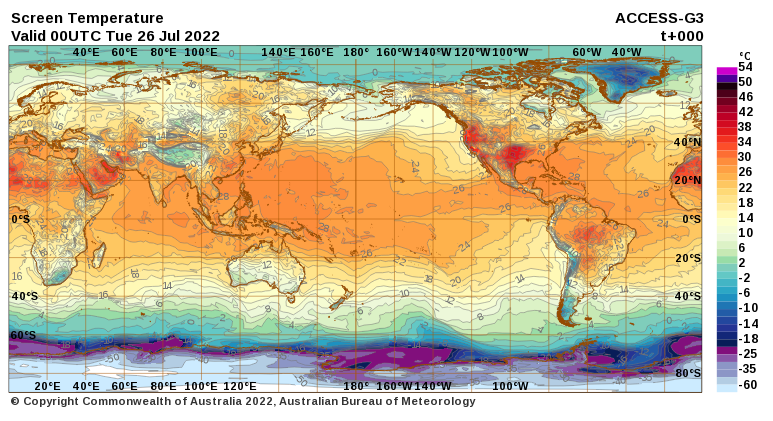


In [ ]:
#
# Get Color Range
#
print(np.round( (-25-18)/2.,0))

top_temperature_levels_degC = np.array([ -60, -48, -35, -30, -25, -22, -18,
                                         -16, -14, -12, -10,  -8,  -6,
                                          -4,  -2,   0,   2,   4,   6,
                                           8,  10,  12,  14,  16,  18,
                                          20,  22,  24,  26,  28,  30,
                                          32,  34,  36,  38,  40,  42,
                                          44,  46,  48,  50,  52,  54, 99])

all_temperature_levels_degC = np.array([ -70, -60, -48, -35, -30, -25, -22, -18,
                                         -16, -14, -12, -10,  -8,  -6,
                                          -4,  -2,   0,   2,   4,   6,
                                           8,  10,  12,  14,  16,  18,
                                          20,  22,  24,  26,  28,  30,
                                          32,  34,  36,  38,  40,  42,
                                          44,  46,  48,  50,  52,  54, 60])

bot_temperature_levels_degC     = top_temperature_levels_degC.copy()
bot_temperature_levels_degC[1:] = top_temperature_levels_degC[0:-1]
bot_temperature_levels_degC[0]  = top_temperature_levels_degC[0]-10
top_temperature_levels_degC[-1] = bot_temperature_levels_degC[-1]+10



print("Top Range")
print(top_temperature_levels_degC)
print("Bot Range")
print(bot_temperature_levels_degC)


nc = len(top_temperature_levels_degC)

print(len(top_temperature_levels_degC),len(bot_temperature_levels_degC))


plt.plot(top_temperature_levels_degC)
plt.plot(bot_temperature_levels_degC)



## Get Color Table

In [ ]:
#
# Crack Color Strip Svcreen Capture Image
#

array          = plt.imread("./colorbar.png")    

#
# RGB Bands Scale to 0 to 255
#

array[:,:,0:3] = np.round(array[:,:,0:3] * 255.,0)

#
# Get Average of each color band.  
#

avgarr         = np.average(array, axis=1)

#
# Get Array sizes
#

nx = len(avgarr) # length of image color strip


#
# Create index arrays to the data
#

linepoint      = np.linspace(0,nx-1,nx).astype(int) 


print("   Strip Length ", nx)
print("Number of Colors", nc)


# Plot for Manual Eyeball Counts Of Color Strip Separation Points

In [ ]:
#
# Plot Manual Eyeball Counts Of Color Strip Separation Points
#

x0 = 175 # subsection start
x1 = 200 # subsection end

fig, ax = plt.subplots(figsize=(20,8))
ax.set_title("Partial RGB Table")
ax.plot(linepoint[x0:x1+1], avgarr[x0:x1+1,0], color="red",   marker="o")
ax.plot(linepoint[x0:x1+1], avgarr[x0:x1+1,1], color="green", marker="o")
ax.plot(linepoint[x0:x1+1], avgarr[x0:x1+1,2], color="blue",  marker="o")
plt.show()

# Manual Separation Points for Color Strip and Midpoint Calculations

In [ ]:
#
# Manual Separation Points for Color Strip
#

strip_division_points = np.array([  0,  7, 14, 22, \
                                   29, 37, 45,     \
                                   52, 60, 67,     \
                                   75, 82, 90, 97, \
                                  105,113,120,     \
                                  128,135,143,150, \
                                  158,165,173,     \
                                  181,188,196,     \
                                  203,211,218,     \
                                  226,233,241,249, \
                                  256,264,271,     \
                                  279,286,294,     \
                                  301,309,317,324, \
                                  331])

#
# Extraction Points between Strip Separation Points
#

midpoint = np.round((strip_division_points[0:-1] + \
                     strip_division_points[1:])/2,0).astype(int)

delta_box = (strip_division_points[1:]-strip_division_points[0:-1])
print("widths of boxes",delta_box)

print("  Number of Midpoints ", len(midpoint))
print("Number of Temp Blocks ", len(bot_temperature_levels_degC))


#
# Final Plot of RGB Tables
#

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(avgarr[:,0], color=  "red")
ax.plot(avgarr[:,1], color="green")
ax.plot(avgarr[:,2], color= "blue")
ax.plot(linepoint[midpoint], avgarr[midpoint,0], color="red",   marker="o", linestyle="None")
ax.plot(linepoint[midpoint], avgarr[midpoint,1], color="green", marker="o", linestyle="None")
ax.plot(linepoint[midpoint], avgarr[midpoint,2], color="blue",  marker="o", linestyle="None")
for i in midpoint :
    ax.axvline(x = i, color="lightgrey")
ax.set_title("RGB Table")
ax.set_xlim(min(linepoint),max(linepoint))
ax.set_ylim(0,255)
plt.show()




# Create Hex Table for RGB.


In [ ]:
#
# Get Conversion
#

Red   = avgarr[midpoint[::-1], 0].astype(int)
Green = avgarr[midpoint[::-1], 1].astype(int)
Blue  = avgarr[midpoint[::-1], 2].astype(int)


bom_table = pd.DataFrame({"Bottom_DegC" :bot_temperature_levels_degC[0:-1],
                          "Top_DegC"    :top_temperature_levels_degC[0:-1],
                          "Bottom_DegF" :bot_temperature_levels_degC[0:-1] * 9./5 + 32,
                          "Top_DegF"    :top_temperature_levels_degC[0:-1] * 9./5 + 32,
                          "Red"         :Red[0:-1],
                          "Green"       :Green[0:-1],
                          "Blue"        :Blue[0:-1]})

#print("Double-Grey Table")
#display(bom_table)
#print(" ")

#
# Fix those two identical grey colors 
#


bom_table[  "Red"][2] = np.round((bom_table[ "Red"][1]+bom_table[  "Red"][3])/2 ,0).astype(int)
bom_table["Green"][2] = np.round((bom_table["Green"][1]+bom_table["Green"][3])/2 ,0).astype(int)
bom_table[ "Blue"][2] = np.round((bom_table[ "Blue"][1]+bom_table[ "Blue"][3])/2 ,0).astype(int)




Hex = ['#%02x%02x%02x' % (bom_table[  "Red"][i],  \
                          bom_table["Green"][i],  \
                          bom_table[ "Blue"][i] ) \
       for i in range(len(bom_table)) ]

bom_table["Hex"] = Hex

print(" ")
print("Fixed-Grey Table")
display(bom_table)
print(" ")

temperature_colormap = mpl.colors.ListedColormap(colors = bom_table["Hex"])



In [ ]:
#
# Final Plot of RGB Tables
#



mid_temperature_levels_degC = (bot_temperature_levels_degC + top_temperature_levels_degC)/2.



fig, ax = plt.subplots(figsize=(20,8))
ax.plot(mid_temperature_levels_degC, Red,            color=   "red", marker="o", linestyle="None")
ax.plot(mid_temperature_levels_degC, Green,          color= "green", marker="o", linestyle="None")
ax.plot(mid_temperature_levels_degC, Blue,           color=  "blue", marker="o", linestyle="None")
for i in range(len(midpoint)) :
    ax.axvline(x = mid_temperature_levels_degC[i], color=Hex[i])
ax.set_title("RGB Table")
ax.set_xlabel("central temperature")


ax.set_xlim(min(bot_temperature_levels_degC),max(top_temperature_levels_degC))
ax.set_ylim(0,255)
plt.show()



###################################################
#
# BOM Temperature Color Table.
#

bom_temp_colorsx = ['#ccebff' , # -999°C -999°F  | -999°C -999°F 
                   '#b6ceec' , #  -60°C  -76°F  |  -26°C  -15°F 
                   '#a1b2d9' , #  -48°C  -54°F  |  -24°C  -11°F 
                   '#8c96c6' , #  -35°C  -31°F  |  -22°C   -8°F 
                   '#8855a7' , #  -30°C  -22°F  |  -20°C   -4°F 
                   '#880f7c' , #  -25°C  -13°F  |  -18°C    0°F 
                   '#081d58' , #  -22°C   -7°F  |  -16°C    3°F 
                   '#132778' , #  -18°C    0°F  |  -14°C    7°F 
                   '#204184' , #  -16°C    3°F  |  -12°C   10°F 
                   '#2d5c91' , #  -14°C    7°F  |  -10°C   14°F 
                   '#3b779e' , #  -12°C   10°F  |   -8°C   18°F 
                   '#4892ab' , #  -10°C   14°F  |   -6°C   21°F 
                   '#55adb8' , #   -6°C   21°F  |   -4°C   25°F 
                   '#63c8c5' , #   -2°C   28°F  |   -2°C   28°F 
                   '#7fcdbb' , #    0°C   32°F  |    0°C   32°F 
                   '#98dca6' , #    2°C   36°F  |    2°C   36°F 
                   '#c7e9b4' , #    4°C   39°F  |    4°C   39°F 
                   '#dcf2c6' , #    6°C   43°F  |    6°C   43°F 
                   '#edf8d9' , #    8°C   46°F  |    8°C   46°F 
                   '#f5fcd3' , #   10°C   50°F  |   10°C   50°F 
                   '#fcffcc' , #   12°C   54°F  |   12°C   54°F 
                   '#fff9b6' , #   14°C   57°F  |   14°C   57°F 
                   '#feeda0' , #   16°C   61°F  |   16°C   61°F 
                   '#fee48b' , #   18°C   64°F  |   18°C   64°F 
                   '#fccd7d' , #   20°C   68°F  |   20°C   68°F 
                   '#fbb770' , #   22°C   72°F  |   22°C   72°F 
                   '#f9a062' , #   24°C   75°F  |   24°C   75°F 
                   '#f88a55' , #   26°C   79°F  |   26°C   79°F 
                   '#f67448' , #   28°C   82°F  |   28°C   82°F 
                   '#f55d3a' , #   30°C   86°F  |   30°C   86°F 
                   '#f3472d' , #   32°C   90°F  |   32°C   90°F 
                   '#f23120' , #   34°C   93°F  |   34°C   93°F 
                   '#e3231c' , #   36°C   97°F  |   36°C   97°F 
                   '#d21f1f' , #   38°C  100°F  |   38°C  100°F 
                   '#bd1b25' , #   40°C  104°F  |   40°C  104°F 
                   '#a01527' , #   42°C  108°F  |   42°C  108°F 
                   '#9b0c1e' , #   44°C  111°F  |   44°C  111°F 
                   '#4d0519' , #   46°C  115°F  |   46°C  115°F 
                   '#19000d' , #   48°C  118°F  |   48°C  118°F 
                   '#4c0099' , #   50°C  122°F  |   50°C  122°F 
                   '#cc17cc' , #   52°C  126°F  |   52°C  126°F 
                   '#ffffff']  #   54°C  129°F  |   54°C  129°F 


temperature_colormap = mpl.colors.ListedColormap(colors = Hex)







In [ ]:
x = np.linspace(0,1, 300)
y = np.linspace(0,1, 300)

window1d = np.abs(np.blackman(300))
window2d = np.sqrt(np.outer(window1d,window1d))

X, Y = np.meshgrid(x, y)
ZdegC = window2d * (72+65)  -72
ZdegF = ZdegC * 9 / 5 + 32




fig, ax = plt.subplots(figsize=[20,20])
filled_cm = ax.contourf(X,Y,ZdegC,
            colors      = Hex,
            levels    = all_temperature_levels_degC[0:-1])


plt.colorbar(filled_cm, 
                 label  = r"2-m Temperature (°C)",
                 shrink = 1, #extend = 'both',
                 pad    = 0.012,
                 ticks  = all_temperature_levels_degC[0:-1],
                 values = all_temperature_levels_degC[0:-1],
                 format = '%+d')

#plt.contour(X,Y,ZdegC,levels    = all_temperature_levels_degC,colors="black")

plt.show()



In [ ]:
colors          = Hex
temp_range_degC = all_temperature_levels_degC[0:-1]

print(len(Hex), Hex)
print(len(temp_range_degC), temp_range_degC.tolist())


In [ ]:

temp_range_degC = np.linspace(54.-1.8*43, 54, 44)
temp_range_degF =  np.linspace(-15, 120, 44) #

print("Delta C",temp_range_degC[1]-temp_range_degC[0], (temp_range_degC[1]-temp_range_degC[0])*9/5)
print("Delta F",temp_range_degF[1]-temp_range_degF[0], (temp_range_degF[1]-temp_range_degF[0])*5/9)


print(np.round(temp_range_degC.tolist(),1))
print(np.round(temp_range_degF.tolist(),0))

fig, ax = plt.subplots(figsize=[10,10])
filled_cm = ax.contourf(X,Y,ZdegF,
            colors      = colors,
            levels    = temp_range_degF)


plt.colorbar(filled_cm, 
                 label  = r"2-m Temperature (°F)",
                 shrink = 1, extend = 'both',
                 pad    = 0.012,
                 ticks  = temp_range_degF[::-1],
                 values = temp_range_degF,
                 format = '%+d')

#plt.contour(X,Y,ZdegC,levels    = all_temperature_levels_degC,colors="black")

plt.show()

#print(9/5,1)
#print(2,2*5/9)
#print(9/5*2,2)
#print(3,3*5/9)